In [1]:
#!pip install vaderSentiment 

In [2]:
# Dependencies
import tweepy
import os
import numpy as np
import pandas as pd
import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/pariya/Desktop/pariya_GW_HW_Python_APIs/Twitter-API-Instructions


In [4]:
# get back up 2 level to be on Desktop first, then navigate to 'gwu-' directory which contains config.py inside
os.chdir(os.path.join('..','..','gwu-arl-data-pt-03-2020-u-c'))

# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/pariya/Desktop/gwu-arl-data-pt-03-2020-u-c'

In [5]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True) # This'll make the rest of the code obey the rate limit. StackOverFlow

In [6]:
# Target Search Term ----- BBC, CBS, CNN, Fox, and New York times
target_terms = ("@BBC", "@CBS", "@CNN", "@Fox", "@New York times")

# Appended Lists
tweets_list = []
search_term_list = []

# Loop thru all target users
for target in target_terms:
    
    # Iterate thru the ---most recent 100 tweets on target users---
     for tweet in tweepy.Cursor(api.search, target, tweet_mode='extended').items(100):
        tweets_list.append(tweet)    
        search_term_list.append(target)

        #tweets_list[0]

        user_list = []
        text_list = []
        createdOn_list = []

        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []

        # Loop through all tweets
        for tweet in tweets_list:
                    
            # Run VADER Analysis on each tweet
            tweet_user = tweet.user.screen_name
            tweet_text = tweet.full_text
            tweet_created = tweet.created_at      
        
            # Run sentiments analysis using --tweet.full_text--
            results = analyzer.polarity_scores(tweet_text)
            com = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]

            # Store each value to the appropriate list created above
            user_list.append(tweet_user)
            text_list.append(tweet_text)
            createdOn_list.append(tweet_created)
        
            compound_list.append(com)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [7]:
result_df = pd.DataFrame({
    'User': user_list,
    'Search Term': search_term_list,
    'Tweet Text': text_list,
    'Created on': createdOn_list,
    'Compound': compound_list,
    'Positive': positive_list,
    'Negative': negative_list,
    'Neutral': neutral_list,
})

pd.set_option('display.max_colwidth', -1)

/Users/pariya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


In [8]:
#result_sorted = result_df.sort_values(by=['Created on'])

In [9]:
# Calculate Timestamps from Created_on columns
result_df['Timestamps'] = result_df['Created on'].values.astype(np.int) // 10 ** 9
result_df.head()

,User,Search Term,Tweet Text,Created on,Compound,Positive,Negative,Neutral,Timestamps
0,bar_zie,@BBC,RT @ST3AMCo: @MargKelpi @msMikexcity @BoomtownThe @BoomtownFair @PeteBriquette @PeteStewartEden @edencommunities @PaulGarvey4 @grahamandre…,2020-05-26 07:29:20,0.0000,0.000,0.000,1.000,1590478160
1,JimBGuitars,@BBC,"RT @enuffsa1d: Five minutes later another @BBCBreakfast DomGate piece, that's me and @BBC for the rest of the day! #MOVEON #ScumMedia #BBCB…",2020-05-26 07:29:07,0.0000,0.000,0.000,1.000,1590478147
2,UK_Optimist,@BBC,"The @BBC seem oblivious to what they’ve created - a following solely from like-minded Leftwaffe Guardianistas. What do they offer the rest of us, sweet FA, but they don’t care so long as they can point to adequate viewing figures - from things they have a monopoly on 😏 https://t.co/ndUupdZWVu",2020-05-26 07:29:04,0.8462,0.178,0.000,0.822,1590478144
3,camcruise,@BBC,@PietaHouse @mescal_paul @NormalPeopleBBC @rte @BBC Would like to know the situation with 100 staff that where let go An dybe money recently raised by the late late fundraiser before donating anymore money to pieta in all Honesty.,2020-05-26 07:28:42,0.6908,0.140,0.000,0.860,1590478122
4,Mambear04,@BBC,"@Fanxxxxtastic @unojen_wood @KayBurley #skynews miss that Cummings issued a tissue of lies, totally missed wife Mary’s dialogues of his ‘battle’ of Covid-19 @BBC Radio4 &amp; Spectator column before birthday jaunts to Durham 🙄 no scrutiny of Johnson’s sheer desperation to hold onto ‘Dom’ not missed! #ToryLiars",2020-05-26 07:28:40,-0.8590,0.033,0.216,0.751,1590478120


In [10]:
# get back up 2 level to be on Desktop first, then navigate to 'pariya_FW_HW' directory which contains twtpy inside
os.chdir(os.path.join('..','pariya_GW_HW_Python_APIs', 'Twitter-API-Instructions'))
# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/pariya/Desktop/pariya_GW_HW_Python_APIs/Twitter-API-Instructions'

In [17]:
result_df.to_csv('output/sentiment_analysis.csv', index=False)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#ts_max = result_df['Timestamps'].max()
#ts_min = result_df['Timestamps'].min()
#print(ts_max, ts_min)

In [14]:
# Filter each News channel to work on ---@BBC, @CBS, @CNN, @Fox, @New York times---
bbc = result_df.loc[result_df['Search Term']=='@BBC', :]
cbs = result_df.loc[result_df['Search Term']=='@CBS', :]
cnn = result_df.loc[result_df['Search Term']=='@CNN', :]
fox = result_df.loc[result_df['Search Term']=='@Fox', :]
nyt = result_df.loc[result_df['Search Term']=='@New York times', :]

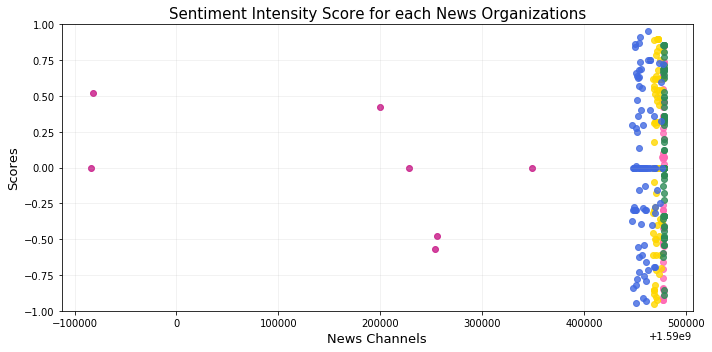

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(bbc['Timestamps'], bbc['Compound'], color="hotpink", alpha=0.8)
ax.scatter(cbs['Timestamps'], cbs['Compound'], color="gold", alpha=0.8)
ax.scatter(cnn['Timestamps'], cnn['Compound'], color="seagreen", alpha=0.8)
ax.scatter(fox['Timestamps'], fox['Compound'], color="royalblue", alpha=0.8)
ax.scatter(nyt['Timestamps'], nyt['Compound'], color="mediumvioletred", alpha=0.8)

ax.set_ylim(-1, 1)
#ax.set_xlim(100, 0)
ax.set_xlabel('News Channels', fontsize=13)
ax.set_ylabel('Scores', fontsize=13)
ax.set_title('Sentiment Intensity Score for each News Organizations', fontsize=15)

ax.grid(alpha=.2)
fig.tight_layout()

plt.savefig('Images/sentiment_score.png')

plt.show()

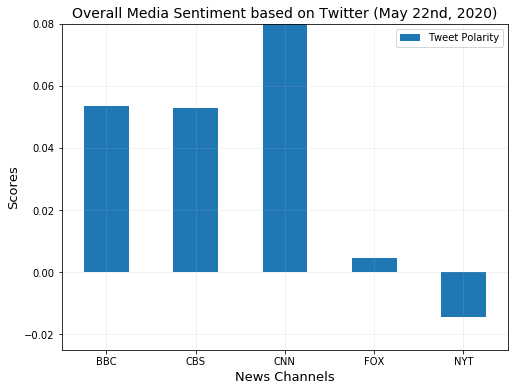

In [20]:
bbc_av = bbc['Compound'].mean()
cbs_av = cbs['Compound'].mean()
cnn_av = cnn['Compound'].mean()
fox_av = fox['Compound'].mean()
nyt_av = nyt['Compound'].mean()

index = ["@BBC", "@CBS", "@CNN", "@Fox", "@New York times"]

df = pd.DataFrame({'Channels': ['BBC', 'CBS', 'CNN', 'FOX', 'NYT'], 
                   'Tweet Polarity': [bbc_av, cbs_av, cnn_av, fox_av, nyt_av]})

ax = df.plot.bar(x='Channels', y='Tweet Polarity', rot=0, figsize=(8, 6))

ax.set_xlabel('News Channels', fontsize=13)
ax.set_ylabel('Scores', fontsize=13)
ax.set_title('Overall Media Sentiment based on Twitter (May 22nd, 2020)', fontsize=14)
ax.grid(alpha=0.2)
#fig.tight_layout()

ax.set_ylim(-0.025, 0.08)

plt.savefig('Images/overall_media_sentiment.png')